In [415]:
import pandas as pd
import numpy as np
from directory import data as data_dir, images
import scipy.stats as sstats
import statsmodels.stats.weightstats as wstats

In [416]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep').as_hex()
%matplotlib inline
pd.options.display.max_columns=100

from clustering import drop_columns

plt.rcParams['font.size'] = 16
sns.set_context(rc = {'patch.linewidth': 0.0})

import paxplot
from importlib import reload
reload(paxplot)
from paxplot import centroid_plot, cluster_plots, pca_2comp_plot, generate_feature_labels

In [449]:
pal = '''<color-palette name="{}" type="regular" >{}\n</color-palette>'''

for i in range(7):
    name = "seaborndeep-skip{}".format(i)
    colors = ""
    for j, c in enumerate(palette):
        if i == j:
            continue
        colors += "\n    <color>{}</color>".format(c)
    print(pal.format(name, colors))

<color-palette name="seaborndeep-skip0" type="regular" >
    <color>#dd8452</color>
    <color>#55a868</color>
    <color>#c44e52</color>
    <color>#8172b3</color>
    <color>#937860</color>
    <color>#da8bc3</color>
    <color>#8c8c8c</color>
    <color>#ccb974</color>
    <color>#64b5cd</color>
</color-palette>
<color-palette name="seaborndeep-skip1" type="regular" >
    <color>#4c72b0</color>
    <color>#55a868</color>
    <color>#c44e52</color>
    <color>#8172b3</color>
    <color>#937860</color>
    <color>#da8bc3</color>
    <color>#8c8c8c</color>
    <color>#ccb974</color>
    <color>#64b5cd</color>
</color-palette>
<color-palette name="seaborndeep-skip2" type="regular" >
    <color>#4c72b0</color>
    <color>#dd8452</color>
    <color>#c44e52</color>
    <color>#8172b3</color>
    <color>#937860</color>
    <color>#da8bc3</color>
    <color>#8c8c8c</color>
    <color>#ccb974</color>
    <color>#64b5cd</color>
</color-palette>
<color-palette name="seaborndeep-skip3" type="reg

In [417]:
drop_cols = ['age_median2017', 'population_total2017', 'household_income_median2017',\
    'home_value_median2017', 'housing_units_total2017', 'geoid', 'oz', \
    'LICadj', 'eligible']

In [421]:
labels = pd.read_pickle("{}/kmeans/labels.pkl".format(data_dir))
clean = pd.read_pickle("{}/clean.pkl".format(data_dir))
ozs = clean[clean['oz'] == 1].reset_index(drop=True)
all_e = clean[clean['eligible'] == 1]
not_picked = all_e[all_e['oz'] == 0]

In [457]:
not_picked.groupby("LICadj").agg({'LICadj':'count'})

,LICadj
LICadj,
0,25309
1,8423


In [422]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [423]:
data_labels = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'other eligible tracts']
X_e = not_picked.drop(columns=drop_cols)
X_ozs = ozs.drop(columns=drop_cols)
features= X_e.columns
feature_labels = generate_feature_labels(features)

In [424]:
k6 = labels[['k=6', 'k6silhouette_score']]
outliers_mask = k6['k6silhouette_score'] < 0
outliers = ozs[outliers_mask]
cluster_masks = []

for c in np.unique(k6['k=6']):
    cluster_masks.append(k6['k=6'] == c)

In [425]:
X_alle = all_e.drop(columns=drop_cols)
std_scaler = StandardScaler()
std_X = std_scaler.fit_transform(X_alle)
n = 9
paxPCA = PCA(n_components=n)
pca_all = paxPCA.fit(std_X)

In [426]:
pca_objs = []
data = [X_e, X_ozs]
for d in data:  
    std_scaler = StandardScaler()
    std_X = std_scaler.fit_transform(d)
    n = 9
    paxPCA = PCA(n_components=n)
    pca_objs.append(paxPCA.fit(std_X))

In [453]:
suspect = pd.read_pickle("{}/suspect_tracts.pkl".format(data_dir))
suspect_dropped = drop_columns(suspect, drop_cols)
suspect_geoids = ['24033807200', '24033807000', '12086000109', '22071013400', '48201100000', '23005000300', '12099001700']
k6.iloc[suspect.index]

,k=6,k6silhouette_score
1570,0,0.150088
1779,1,-0.049932
3110,0,0.183065
3217,0,0.147833
3264,3,0.037323
3271,1,0.068808
7026,1,0.004603


Cluster 0: 
* Oleta River State Park (Miami, FL)
* Old Port (Portland, ME)
* Warehouse District (New Orleans, LA)

Cluster 1: 
* Northwood Gardens (W. Palm Beach, FL)
* U. of Maryland (College Park, MD)
* Market Square (Houston, TX)

In [454]:
suspect.head(10)

,population_total2017,age_median2017,household_income_median2017,home_value_median2017,structure_year_median2017,housing_units_total2017,percent_race_white2017,percent_race_black2017,percent_poverty_2017,percent_tenure_owner2017,percent_occupancy_vacant2017,percent_housing_units_mobile2017,percent_single_unit_housing2017,percent_bachelorsplus2017,percent_enrolled2017,change_population_total,change_household_income_median,change_home_value_median,change_housing_units_total,geoid,oz,LICadj,eligible
1570,14944.0,40.8,65160.0,170100.0,61.0,5820.0,0.861684,0.085252,0.130822,0.796263,0.053608,0.138144,0.765292,0.240963,0.058528,0.057608,-0.000245,-0.087446,0.078577,12086000109,1,0,1
1779,3251.0,53.4,57708.0,365700.0,29.0,2160.0,0.896647,0.065518,0.138727,0.691480,0.282870,0.004630,0.433333,0.349745,0.042920,0.003705,-0.019688,0.186567,-0.101124,12099001700,1,0,1
3110,9734.0,33.9,50954.0,167300.0,62.0,3960.0,0.855250,0.103452,0.140847,0.698951,0.122475,0.042677,0.701768,0.205905,0.068448,0.175604,-0.030574,0.018879,0.011494,22071013400,1,0,1
3217,3833.0,64.9,54041.0,176300.0,31.0,2211.0,0.460736,0.308114,0.068093,0.795603,0.044324,0.000000,0.635911,0.386766,0.067859,0.083380,-0.043691,-0.103255,0.015152,23005000300,1,0,1
3264,6357.0,42.7,122091.0,325000.0,48.0,1968.0,0.135441,0.703319,0.103823,0.857143,0.037093,0.000000,0.986789,0.278796,0.064296,0.154559,0.258086,-0.090146,-0.010060,24033807000,1,0,1
3271,6121.0,35.5,54508.0,362600.0,29.0,1861.0,0.183303,0.342264,0.122856,0.456918,0.056959,0.024181,0.436862,0.287291,0.075600,0.080304,0.021285,0.055911,0.005402,24033807200,1,0,1
7026,4278.0,31.7,39278.0,114600.0,44.0,1923.0,0.562179,0.212950,0.205002,0.360795,0.155486,0.000000,0.492980,0.188417,0.097330,-0.062664,-0.027291,0.096651,-0.041854,48201100000,1,0,1


In [442]:
ozs['label'] = k6['k=6']
ozs.head()
ozs.to_csv("{}/labelled_tracts.csv".format(data_dir))

In [452]:
csv = pd.read_csv("{}/labelled_tracts.csv".format(data_dir))
csv.groupby("label").agg({'label':'count'})

,label
label,
0,3111
1,1835
2,1469
3,804
4,130
5,361


In [438]:
groups = k6.groupby("k=6").agg({'k=6':'count'})
groups['proportion'] = groups['k=6'] / np.sum(groups['k=6'])

In [458]:
groups.iloc[:, 0]

k=6
0    3111
1    1835
2    1469
3     804
4     130
5     361
Name: k=6, dtype: int64

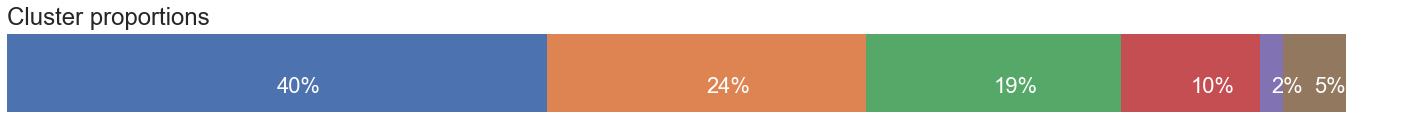

In [439]:
f, ax = plt.subplots(figsize=(20, 2))
bottom = 0
for i, p in enumerate(groups['proportion']):
    ax.barh(1, p, height = 0.2, left=bottom, color=palette[i])
    ax.annotate('{:.0f}%'.format(p*100), (bottom + (p/2), 0.95),\
            xycoords='data', color="white", fontsize=22)
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")
    ax.set_title("Cluster proportions", loc='left', fontsize = 24)
    bottom += p
    
f.tight_layout()
## add proper directory
plt.savefig("{}/cluster_proportions.png".format(images), dpi=120, transparent=True)

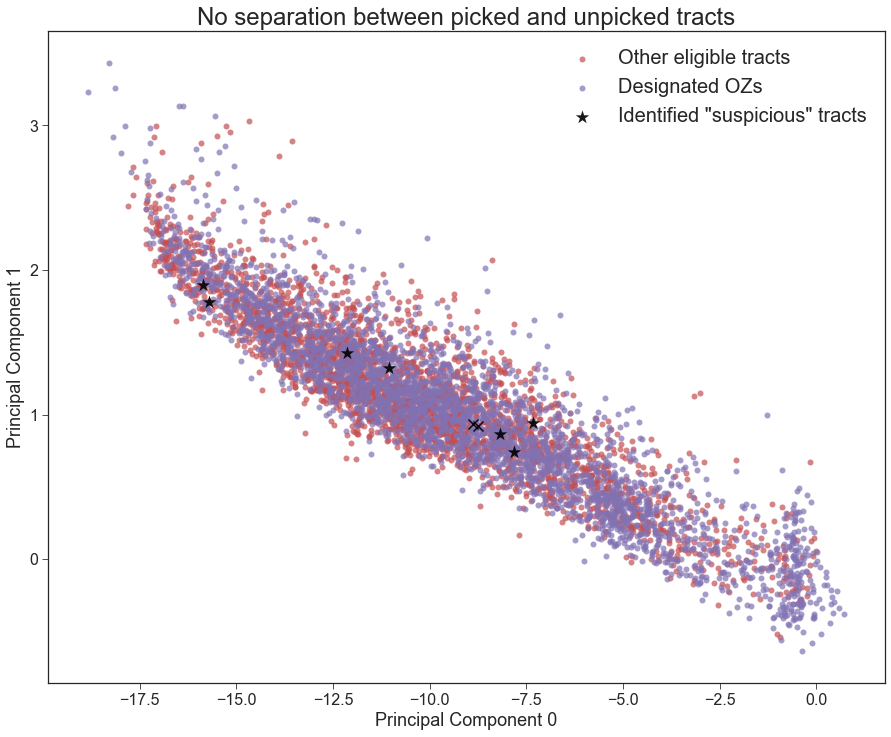

In [440]:
fig, ax = plt.subplots(figsize=(15, 12))
data_labels = ["Other eligible tracts", "Designated OZs"]
for i, p in enumerate(pca_objs):
    ## plot picked and not-picked
    pca_2comp_plot(ax, pca_all, data[i], n_points=3000, \
        scatter_kwargs={'color':palette[i+3],'alpha':0.7, 'label':data_labels[i]})

#plot corrupt tracts
pca_2comp_plot(ax, pca_all, suspect, show_centroid=False, \
        scatter_kwargs={'color':'k', 'marker':"*", 's':200,\
                        'alpha':0.9, 'label':'Identified \"suspicious\" tracts'})
  
ax.set_title("No separation between picked and unpicked tracts", fontsize=24)

## add proper directory
plt.savefig("{}/pca_noseparation.png".format(images), dpi=120, transparent=True)

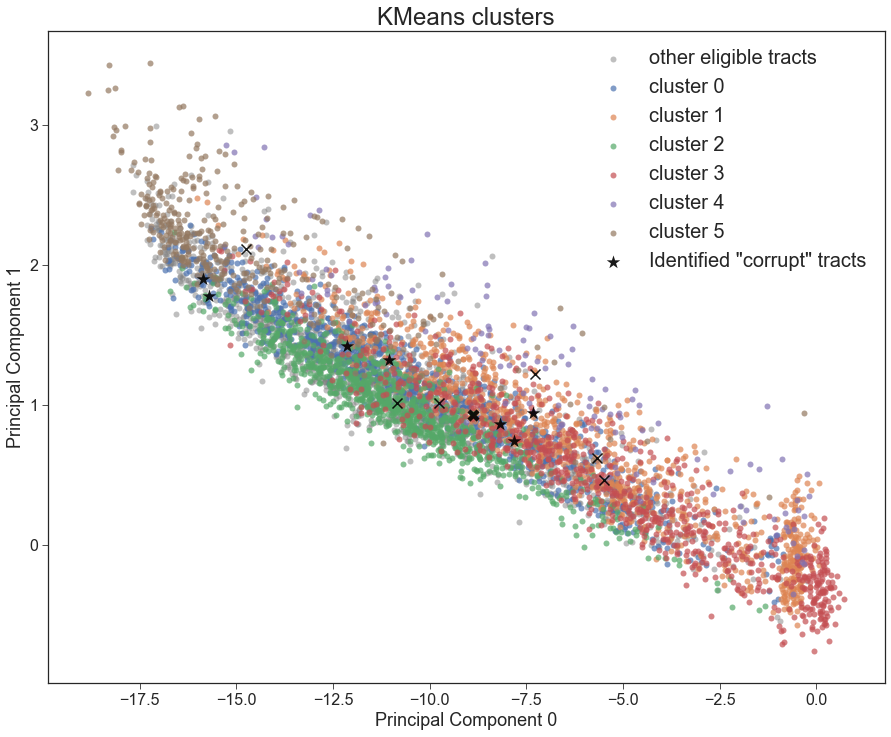

In [441]:
fig, ax = plt.subplots(figsize=(15, 12))
data_labels = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'other eligible tracts']
for i, p in enumerate(pca_objs):

    if i == 1: ## in other words, if we're working on oz data
        for j, mask in enumerate(cluster_masks):
            pca_2comp_plot(ax, pca_all, data[i][mask], n_points=1000, \
                scatter_kwargs={'color':palette[j],'alpha':0.7, 'label':data_labels[j]})
    else:
        pca_2comp_plot(ax, pca_all, data[i], n_points=1500,\
            scatter_kwargs={'color':'gray','alpha':0.5, 'label':data_labels[-1]},\
            centroid_kwargs={'marker':"X", 's':150})
        
pca_2comp_plot(ax, pca_all, suspect, show_centroid=False, \
        scatter_kwargs={'color':'k', 'marker':"*", 's':200,\
                        'alpha':0.9, 'label':'Identified \"corrupt\" tracts'})

ax.set_title("KMeans clusters", fontsize=24)

## add proper directory
plt.savefig("{}/pca_clusters.png".format(images), dpi=120, transparent=True)

In [323]:
## loading ranks
def _loadings(pca_object):
    components = pca_object.components_
    for c in components:
        sorted_i_desc = np.argsort(c)
        print(feature_labels[sorted_i_desc])
_loadings(pca_all)

TypeError: only integer scalar arrays can be converted to a scalar index

In [90]:
def percent_differences(data1, data2):
    array = []
    for feature in range(len(data1[0, :])):
        a, b = data1[:, feature], data2[:, feature]
        percent_diff = (np.mean(a) - np.mean(b)) / np.mean(b)
        _, prob = wstats.ztest(a, b)
        array.append([percent_diff, prob])
    return np.array(array)

In [137]:
pp = percent_differences(X_ozs.values, X_alle.values)
changes = pp[:,0]
sig_zproba = pp[:, 1] < 0.05
color_seq = np.array([palette[7] for c in range(len(changes))])
# red = index 3, green = 2
gainloss = np.where(changes >= 0, palette[2], palette[3])
color_seq[sig_zproba] = gainloss[sig_zproba]
color_seq

array(['#8c8c8c', '#c44e52', '#55a868', '#8c8c8c', '#c44e52', '#8c8c8c',
       '#8c8c8c', '#c44e52', '#8c8c8c', '#8c8c8c', '#8c8c8c', '#8c8c8c',
       '#8c8c8c', '#8c8c8c'], dtype='<U7')

In [253]:
changes

array([-0.01164016, -0.01523226,  0.04989971,  0.01790906, -0.00946842,
        0.00974219,  0.00305938, -0.01071897,  0.00084246,  0.00111919,
       -0.04601914,  0.01151534,  0.01447025, -0.04645183])

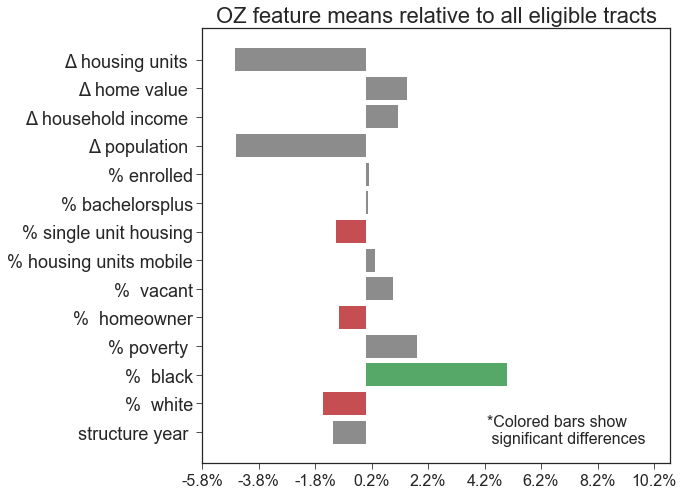

In [252]:
def percentage_plot(ax, features, centroid, kwargs={}):
    '''Plot percent change of each feature on the cluster. Set ax title outside.
    Params:
        ax: Matplotlib ax object to plot on
        features: array of strings (n,)
        centroid: array of weightings (n,)
    '''
    y = np.arange(len(centroid))
    ax.barh(y, centroid, tick_label=features, **kwargs)
    ax.set_yticklabels(features, fontsize=18)
    xmin, xmax = np.min(centroid) - 0.0115, np.max(centroid) + 0.058
    xtks = np.arange(xmin, xmax, .02)
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(xtks)
    ax.set_xticklabels(["{:.1f}%".format(i*100) for i in xtks])

f =plt.figure(figsize=(10,8))
f.subplots_adjust(left=0.25, right=0.9)
ax = f.add_subplot(111)
percentage_plot(ax, feature_labels, pp[:,0], kwargs={'color':color_seq})
ax.set_title("OZ feature means relative to all eligible tracts", fontsize=22)
ax.annotate('*Colored bars show \n significant differences', (320, 280), xytext = (285, 20),\
            xycoords='axes points', fontsize=16)
plt.savefig("{}/feature_comparison.png".format(images), dpi=120, transparent=True)